# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Data
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [3]:
#Shape of the Data
print('Testing Data shape',train.shape)
print('Training Data shape',test.shape)

Testing Data shape (891, 12)
Training Data shape (418, 12)


In [4]:
# View 2 rows 
test.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [5]:
# information of the Data
print('Testing Data info',train.info())

print('----------------------------------------------------------------')
print('****************************************************************')
print('----------------------------------------------------------------')

print('Training Data info',test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
Testing Data info None
----------------------------------------------------------------
****************************************************************
----------------------------------------------------------------
<class 'pandas.core.frame.

In [6]:
# Another way tu check null values
print('Missing values in train',train.isnull().sum())

print('----------------------------------------------------------------')
print('****************************************************************')
print('----------------------------------------------------------------')

print('Missing values in test ',test.isnull().sum())

Missing values in train PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------------------------------------------------------------
****************************************************************
----------------------------------------------------------------
Missing values in test  PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


# Handling Missing Values

In [7]:
# Due tu havy missing values in Cabin column so remove it first
train.drop(columns=["Cabin"],inplace=True)
test.drop(columns=["Cabin"],inplace=True)

In [8]:
test.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q


In [9]:
# train dataset having missing value in Embarkes 
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# add 'S' value in place of missing data
train['Embarked'].fillna('S',inplace=True)

In [11]:
print('Missing values in train',train.isnull().sum())


Missing values in train PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64


In [12]:
test['Fare'].fillna(test['Fare'].mean(),inplace=True)

In [13]:
print('Missing values in test ',test.isnull().sum())

Missing values in test  PassengerId     0
Survived        0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
dtype: int64


In [14]:
train_age=np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(),177)

In [15]:
test_age=np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(),86)

In [16]:
train['Age'][train['Age'].isnull()]=train_age

C:\Users\ABDUL REHMAN G\AppData\Local\Temp\ipykernel_9028\4268069075.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()]=train_age


In [17]:
test['Age'][test['Age'].isnull()]=test_age

C:\Users\ABDUL REHMAN G\AppData\Local\Temp\ipykernel_9028\3484201817.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()]=test_age


In [18]:
# check null values
print('Missing values in train',train.isnull().sum())

print('----------------------------------------------------------------')
print('****************************************************************')
print('----------------------------------------------------------------')

print('Missing values in test ',test.isnull().sum())

Missing values in train PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
----------------------------------------------------------------
****************************************************************
----------------------------------------------------------------
Missing values in test  PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# EDA 

In [19]:
train[ 'Survived' ]=train['Survived'].astype('category')

train['Pclass']=train['Pclass'].astype('category')

train['Sex']=train['Sex'].astype('category')

train[ 'Age']=train[ 'Age'].astype('int')

train[ 'Embarked' ]=train[ 'Embarked'].astype('category')

In [20]:
test[ 'Survived' ]=test['Survived'].astype('category')

test['Pclass']=test['Pclass'].astype('category')

test['Sex']=test['Sex'].astype('category')

test[ 'Age']=test[ 'Age'].astype('int')

test[ 'Embarked' ]=test[ 'Embarked'].astype('category')

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int32   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(3), object(2)
memory usage: 49.4+ KB


In [22]:
test.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,30.315789,0.447368,0.392344,35.627188
std,120.810458,13.214729,0.896760,0.981429,55.840500
min,892.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,22.000000,0.000000,0.000000,7.895800
50%,1100.500000,28.500000,0.000000,0.000000,14.454200
75%,1204.750000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,76.000000,8.000000,9.000000,512.329200


C:\Users\ABDUL REHMAN G\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Out of 891 62 people died in the accident


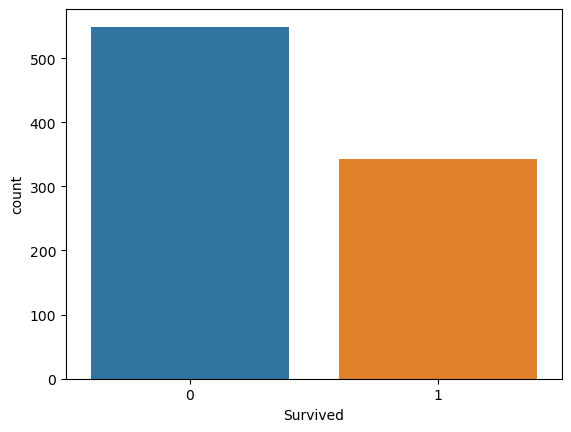

In [23]:
# Univariate Analysis

# Let's start with the Survived col

sns.countplot(train['Survived'])

death_percent=round((train[ 'Survived'].value_counts().values[0]/891)*100)

print("Out of 891 {} people died in the accident".format(death_percent))

C:\Users\ABDUL REHMAN G\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Out of 418 64 people died in the accident


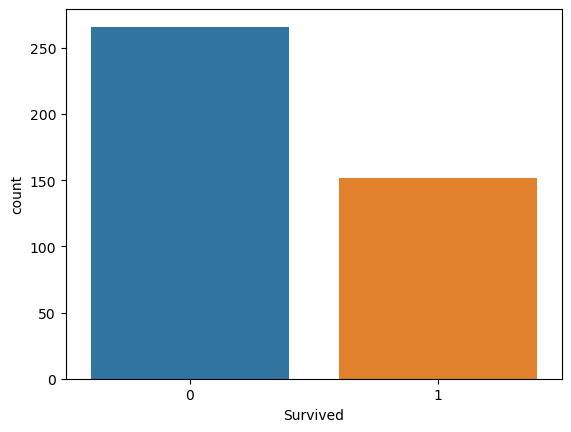

In [24]:
# Univariate Analysis

# Let's start with the Survived col

sns.countplot(test['Survived'])

death_percent=round((test[ 'Survived'].value_counts().values[0]/418)*100)

print("Out of 418 {} people died in the accident".format(death_percent))

C:\Users\ABDUL REHMAN G\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

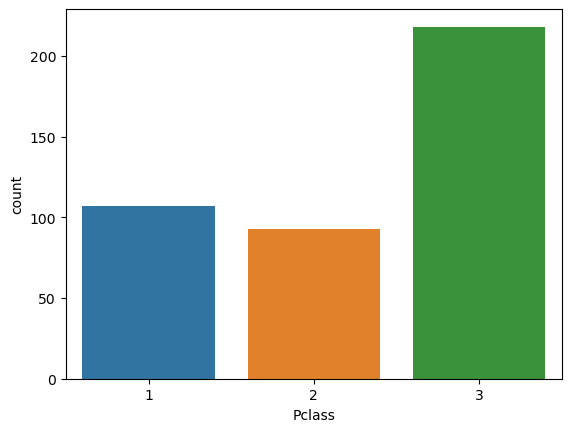

In [25]:
sns.countplot(test['Pclass'])

C:\Users\ABDUL REHMAN G\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

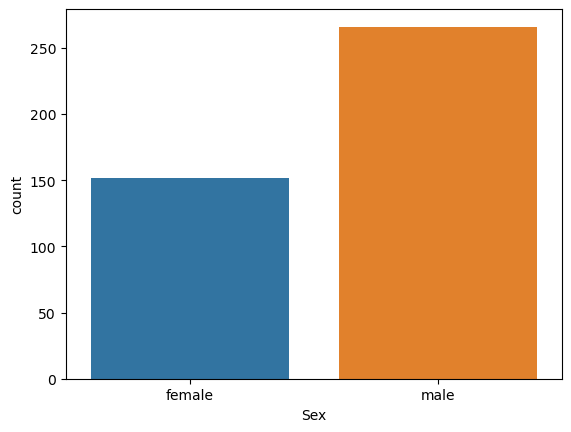

In [26]:
sns.countplot(test['Sex'])

C:\Users\ABDUL REHMAN G\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp', ylabel='count'>

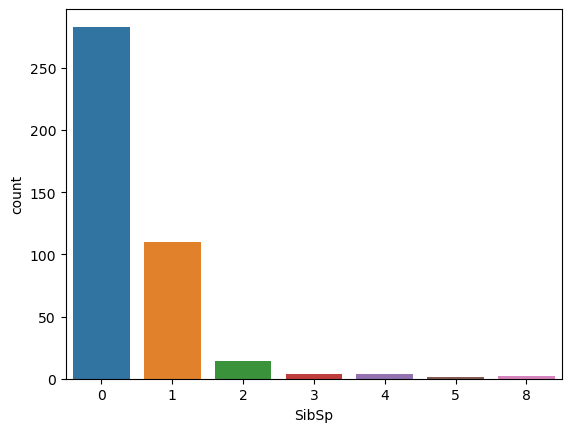

In [27]:
sns.countplot(test['SibSp'])

C:\Users\ABDUL REHMAN G\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

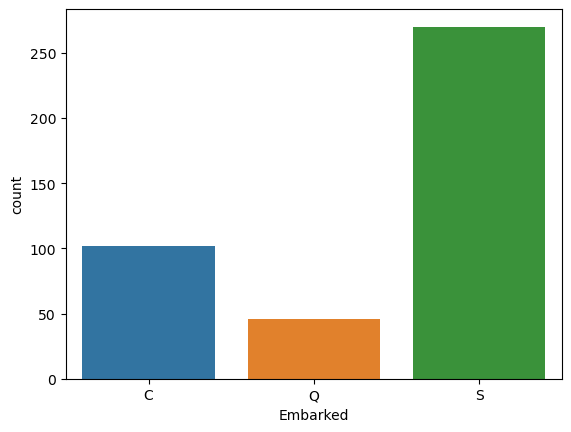

In [28]:
sns.countplot(test['Embarked'])

C:\Users\ABDUL REHMAN G\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

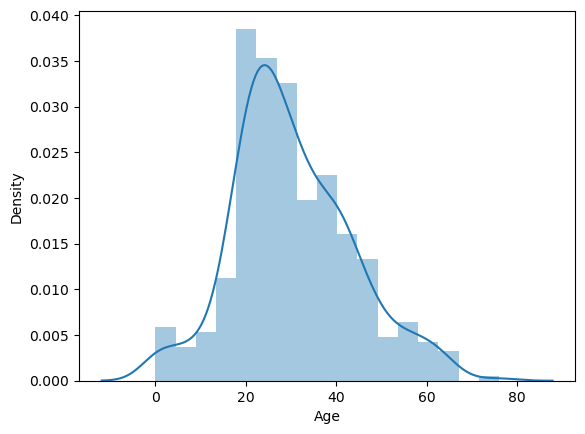

In [29]:
sns.distplot(test['Age'])

C:\Users\ABDUL REHMAN G\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

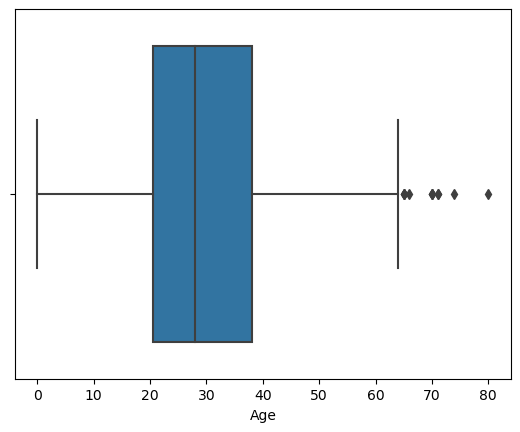

In [30]:
sns.boxplot(train['Age'])

C:\Users\ABDUL REHMAN G\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

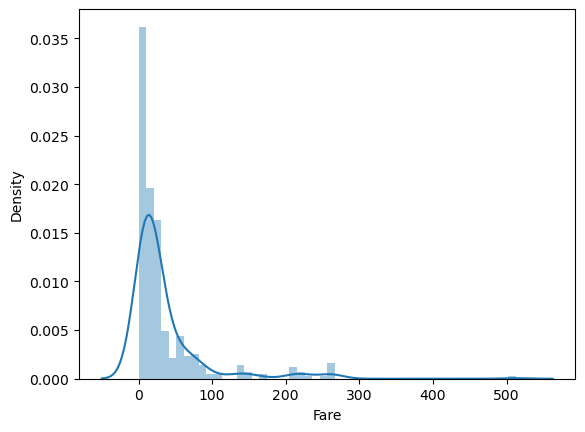

In [31]:
sns.distplot(test["Fare"])

C:\Users\ABDUL REHMAN G\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

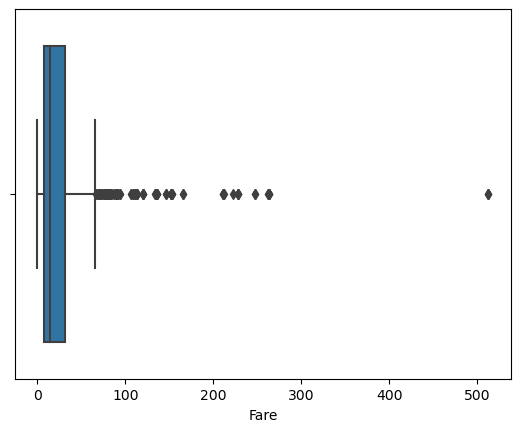

In [32]:
sns.boxplot(train['Fare'])

# conclusion

## Highly skewed data, a lot of people have chiper tickets
## data contain ouliers

C:\Users\ABDUL REHMAN G\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Pclass,,
1,53.3,46.7
2,67.7,32.3
3,67.0,33.0


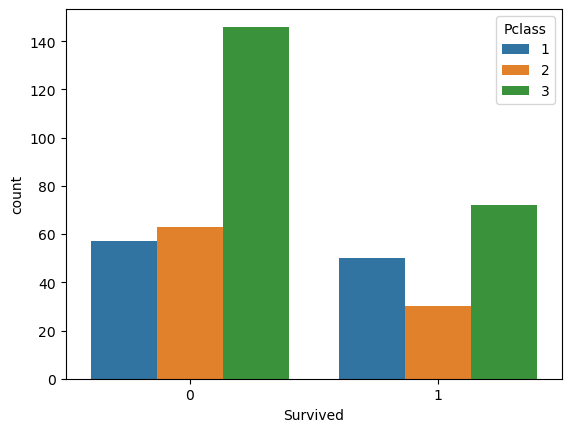

In [33]:
# Multivariate Analysis

# Survival with Pclass

sns.countplot(test[ 'Survived' ], hue=test['Pclass'])

pd.crosstab(test['Pclass'], test['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)


C:\Users\ABDUL REHMAN G\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


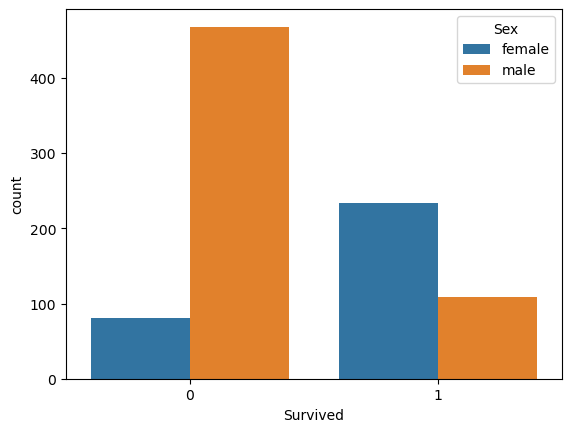

In [34]:
# Multivariate Analysis

# Survival with Pclass

sns.countplot(train['Survived'], hue=train['Sex'])

pd.crosstab(train['Sex'], train['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)


C:\Users\ABDUL REHMAN G\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Survived,0,1
Pclass,,
1,53.3,46.7
2,67.7,32.3
3,67.0,33.0


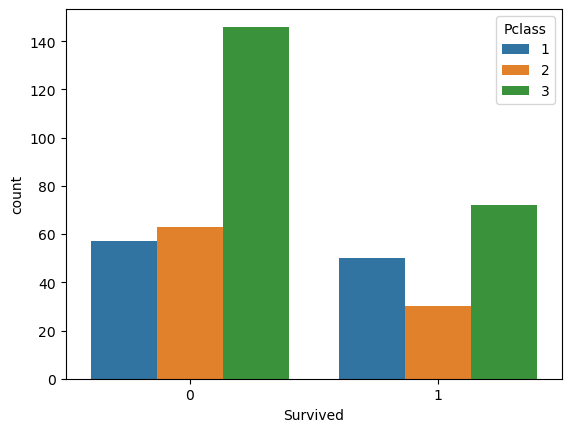

In [35]:
# Multivariate Analysis

# Survival with Pclass

sns.countplot(test['Survived'], hue=test['Pclass'])

pd.crosstab(test['Pclass'], test['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)


C:\Users\ABDUL REHMAN G\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ABDUL REHMAN G\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

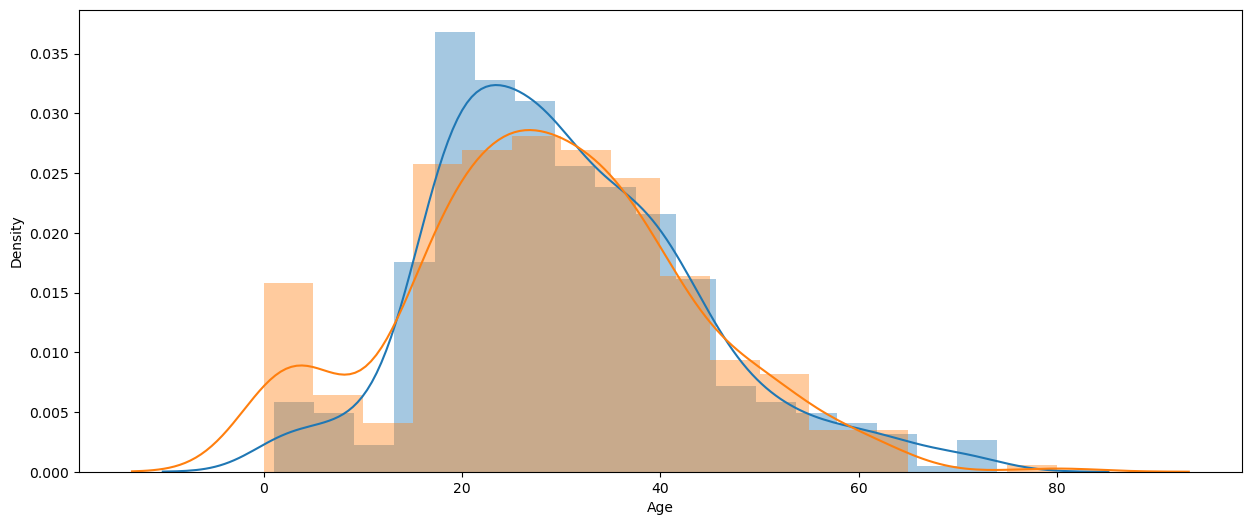

In [36]:
plt.figure(figsize=(15,6))
sns.distplot(train[train['Survived']==0]['Age'])
sns.distplot(train[train['Survived']==1]['Age'])

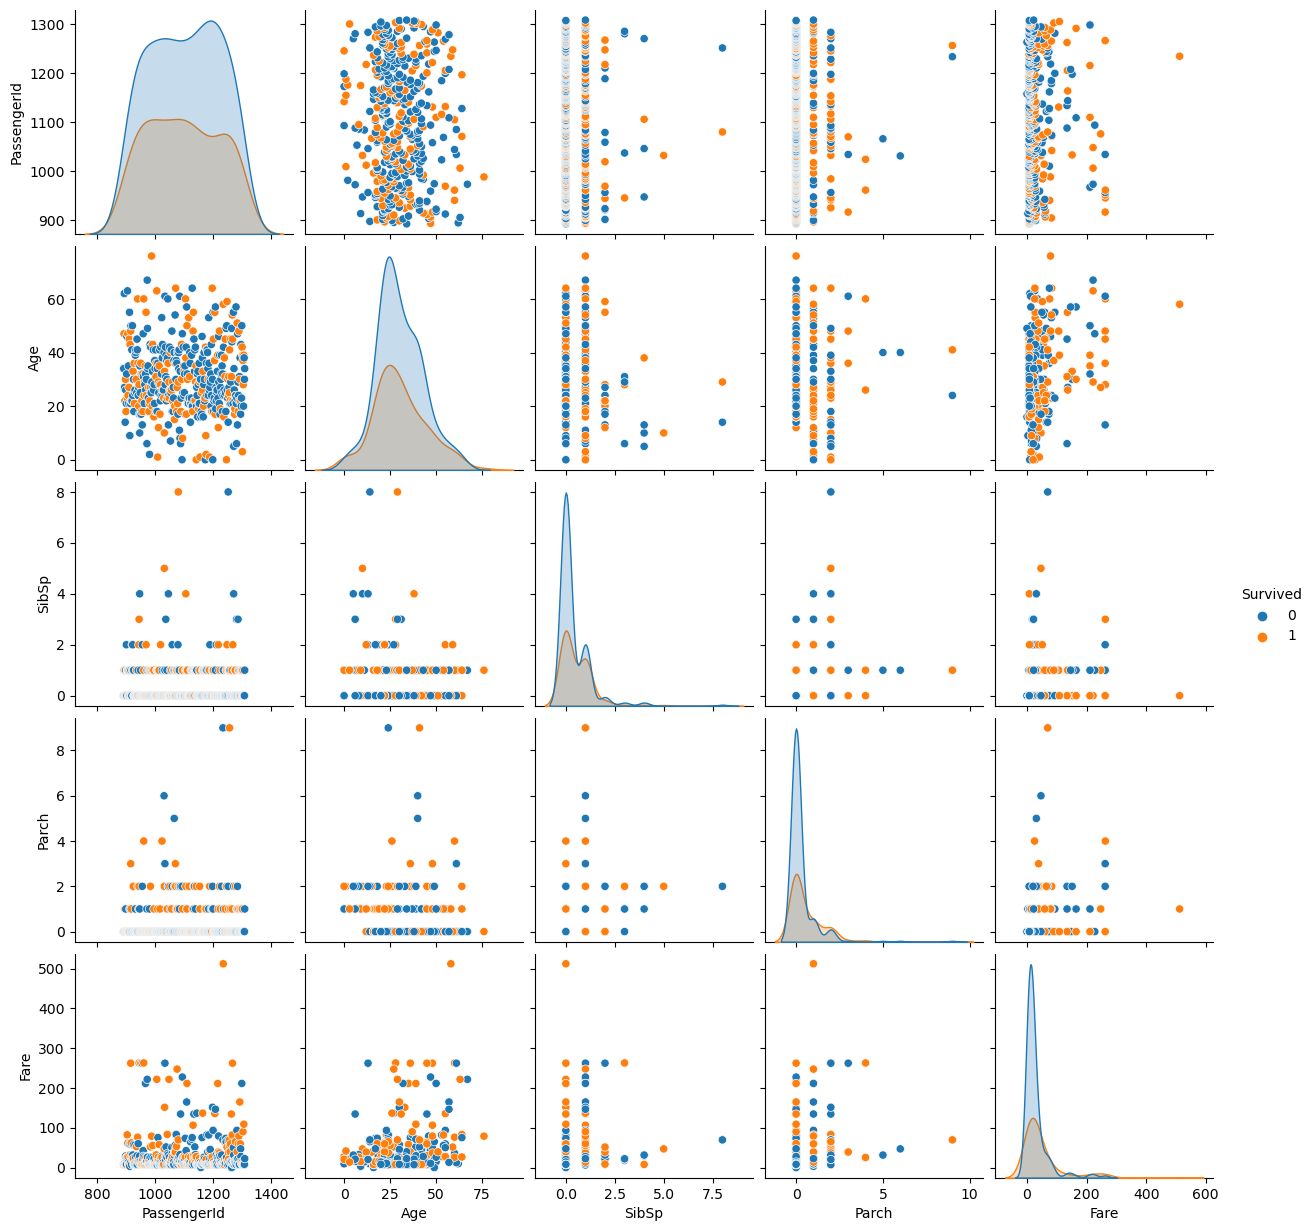

In [37]:
test["Survived"] = pd.Categorical(test["Survived"])

sns.pairplot(test,hue="Survived")

<AxesSubplot:>

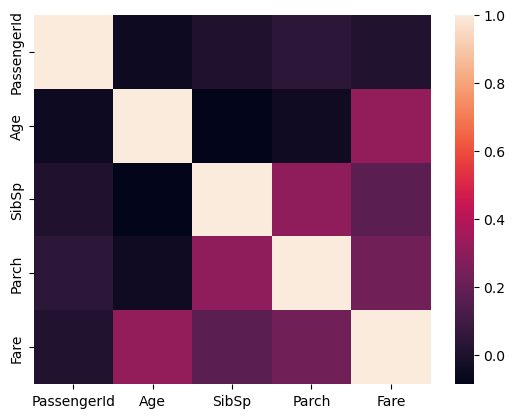

In [38]:
sns.heatmap(test.corr())

In [39]:
test["Family_size"]=test["Parch"]+test["SibSp"]

In [40]:
train["Family_size"]=train["Parch"]+train["SibSp"]

In [41]:
test

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
0,892,0,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,Q,0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,S,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,Q,0
3,895,0,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,S,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,20,0,0,A.5. 3236,8.0500,S,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39,0,0,PC 17758,108.9000,C,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38,0,0,SOTON/O.Q. 3101262,7.2500,S,0
416,1308,0,3,"Ware, Mr. Frederick",male,30,0,0,359309,8.0500,S,0


In [42]:
def family_type(number):
    if number == 0:
            return 'Alone'

    elif number>0 and number<4:
        return 'Medium'
    else:
        return 'Large'
        

In [43]:
train["Family_type"]=train["Family_size"].apply(family_type)

In [44]:
test["Family_type"]=test["Family_size"].apply(family_type)

In [45]:
train.drop(columns=['SibSp','Parch','Family_size'],inplace=True)

In [46]:
test.drop(columns=['SibSp','Parch','Family_size'],inplace=True)

In [47]:
test.shape

(418, 10)

In [48]:
# handling outliers in age (Almost normal)

train=train[train['Age']<(train['Age'].mean() + 3 * train['Age'].std())] 
train.shape

(887, 10)

In [49]:
# handling outliers in age (Almost normal)

test=test[test['Age']<(test['Age'].mean() + 3 * test['Age'].std())] 
test.shape

(417, 10)

In [50]:
# Handling outliers from Fare column

# Finding quartiles
Q1 = np.percentile(train['Fare'], 25)
Q3 = np.percentile(train['Fare'], 75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
outlier_low = Q1 - 1.5 * IQR
outlier_high = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
train = train[(train['Fare'] > outlier_low) & (train['Fare'] < outlier_high)]


In [51]:
# Handling outliers from Fare column in the test DataFrame

# Finding quartiles
Q1 = np.percentile(test['Fare'], 25)
Q3 = np.percentile(test['Fare'], 75)

# Calculate the IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
outlier_low = Q1 - 1.5 * IQR
outlier_high = Q3 + 1.5 * IQR

# Filter the test DataFrame to remove outliers
test = test[(test['Fare'] > outlier_low) & (test['Fare'] < outlier_high)]


In [52]:
train=pd.get_dummies(data=train,columns=['Pclass','Sex','Embarked','Family_type'],drop_first=True)

In [53]:
test=pd.get_dummies(data=test,columns=['Pclass','Sex','Embarked','Family_type'],drop_first=True)


<AxesSubplot:>

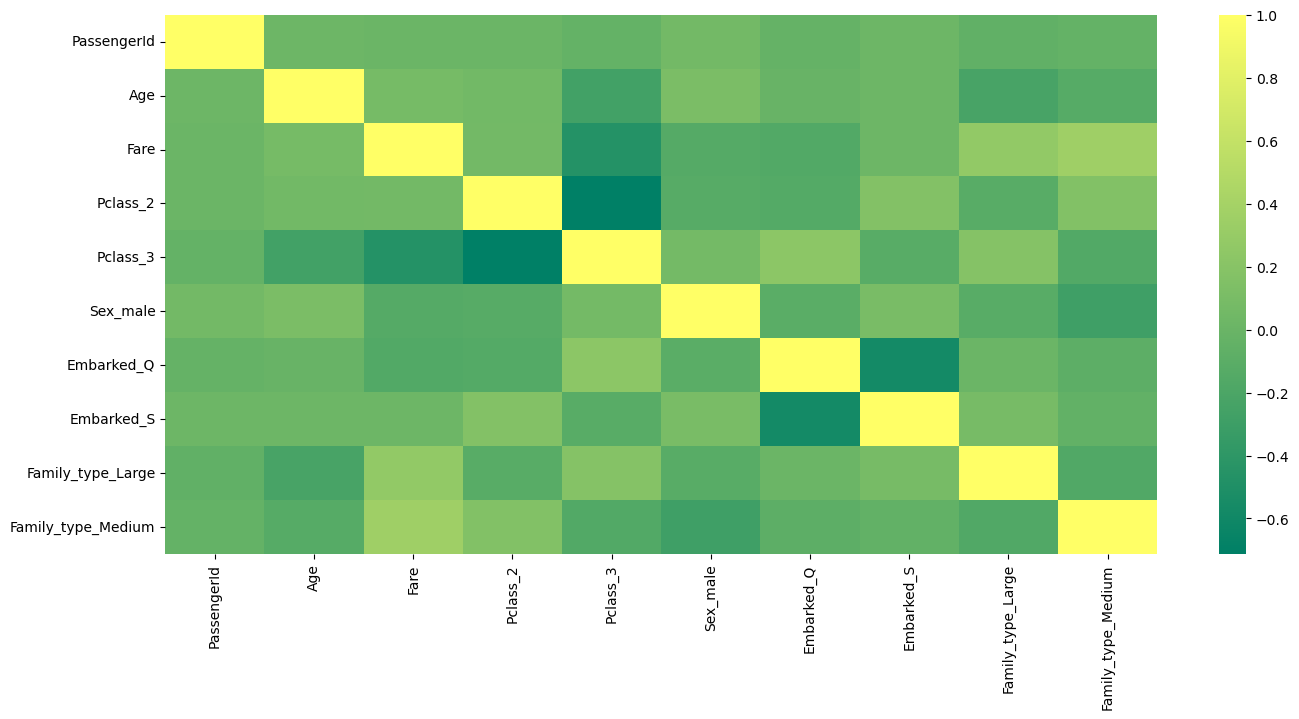

In [54]:
plt.figure(figsize=(16,7))
sns.heatmap(train.corr(),cmap='summer')

In [55]:
train.drop(columns=['Ticket'],inplace=True)

In [56]:
test.drop(columns=['Ticket'],inplace=True)

In [57]:
PassengerId=test['PassengerId'].values

In [58]:
train.drop(columns=['Name','PassengerId'],inplace=True)
test.drop(columns=['Name','PassengerId'],inplace=True)

In [59]:
train.sample(2)

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Family_type_Large,Family_type_Medium
116,0,70,7.75,0,1,1,1,0,0,0
368,1,28,7.75,0,1,0,1,0,0,0


In [60]:
x=train.iloc[:,1:].values
y=train.iloc[:,0].values

In [61]:
X=test.iloc[:,1:].values
Y=test.iloc[:,0].values

In [62]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train, y_test=train_test_split(x,y, test_size=0.2)

In [63]:
X_train,X_test,Y_train, Y_test=train_test_split(X,Y, test_size=0.2)

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
classifer=DecisionTreeClassifier()
clf=RandomForestClassifier()

In [65]:
# classifer.fit(X_train,Y_train)
# classifer.fit(x_train,y_train)

In [66]:
# y_pred=classifer.predict(x_test)
# Y_pred=classifer.predict(X_test)


In [67]:
from sklearn.metrics import accuracy_score


In [68]:
# accuracy_score(y_pred,y_test)

In [69]:
# accuracy_score(Y_pred,Y_test)

In [70]:
x_final=test.iloc[:,:].values


In [71]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust n_estimators and other hyperparameters
clf.fit(x_train, y_train)
clf.fit(X_train, Y_train)


RandomForestClassifier(random_state=42)

In [72]:
y_pred=clf.predict(x_test)
Y_pred=clf.predict(X_test)


In [73]:
 accuracy_score(y_pred,y_test)

0.8064516129032258

In [74]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred)) 

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       114
           1       0.63      0.63      0.63        41

    accuracy                           0.81       155
   macro avg       0.75      0.75      0.75       155
weighted avg       0.81      0.81      0.81       155



In [75]:
import pickle
file=open("my_file.pkl",'wb')
pickle.dump(clf,file)

In [76]:
xf=test.iloc[:,:].values

In [77]:
y_final=clf.predict(xf)

ValueError: X has 10 features, but RandomForestClassifier is expecting 9 features as input.

In [ ]:
y_final.shape

In [ ]:
PassengerId.shape

In [ ]:
final=pd.DataFrame()

In [ ]:
final

In [ ]:
final["PassengerId"]=PassengerId
final["Survives"]=y_final

In [ ]:
final.to_csv('Final.csv',index=False)

In [ ]:
final